In [2]:
import numpy as np  
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.spatial.distance as distance
import statsmodels.stats.multitest as multitest

#set seed
np.random.seed(0)

In [2]:
#Create sample hiring data

def hiring_data(shift, n=1000):
    
    np.random.seed(36)
    
    U = np.random.normal(0, 1, n)
    X = np.random.binomial(1,np.exp(U)/(1+np.exp(U)),n)
    Z = np.random.binomial(1,np.exp(U)/(1+np.exp(U)),n)
    W = np.random.binomial(1,0.3*(np.abs(X-Z)) + 0.1,n)
    Y = np.random.binomial(1,(1/5)*(X+Z-2*X*Z)+(1/4)*W+0.01,n)

    sample_1 = pd.DataFrame({'X':X, 'Z':Z, 'W':W, 'Y':Y})

    if shift == 1:
        U = np.random.normal(0, 1, n)
        X = np.random.binomial(1,np.exp(U)/(1+np.exp(U)),n)
        Z = np.random.binomial(1,np.exp(U)/(1+np.exp(U)),n)
        W = np.random.binomial(1,0.3*(np.abs(X-Z)) + 0.1,n)
        Y = np.random.binomial(1,(1/5)*(X+Z-2*X*Z)+(1/4)*W + 0.1,n)

        sample_2 = pd.DataFrame({'X':X, 'Z':Z, 'W':W, 'Y':Y})
    
    else:

       
        U = np.random.normal(0, 1, n)
        X = np.random.binomial(1,np.exp(U)/(1+np.exp(U)),n)
        Z = np.random.binomial(1,np.exp(U)/(1+np.exp(U)),n)
        W = np.random.binomial(1,0.3*(np.abs(X-Z)) + 0.1,n)
        Y = np.random.binomial(1,(1/5)*(X+Z-2*X*Z)+(1/4)*W+0.01,n)

        sample_2 = pd.DataFrame({'X':X, 'Z':Z, 'W':W, 'Y':Y})
    
    return sample_1, sample_2

sample_1, sample_2 = hiring_data(0)
_ , sample_3 = hiring_data(1)



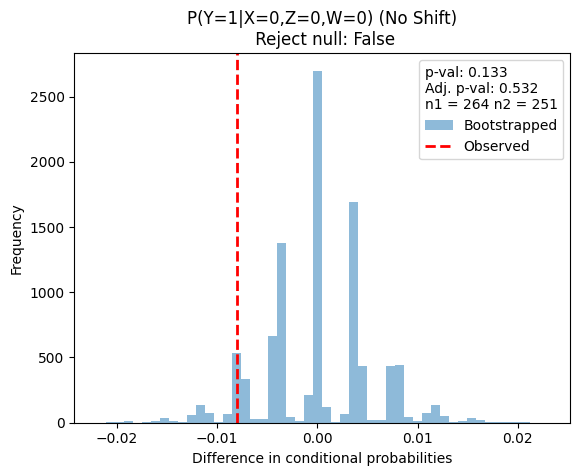

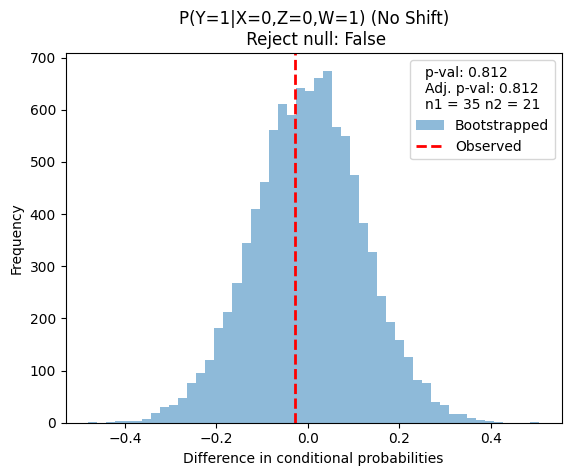

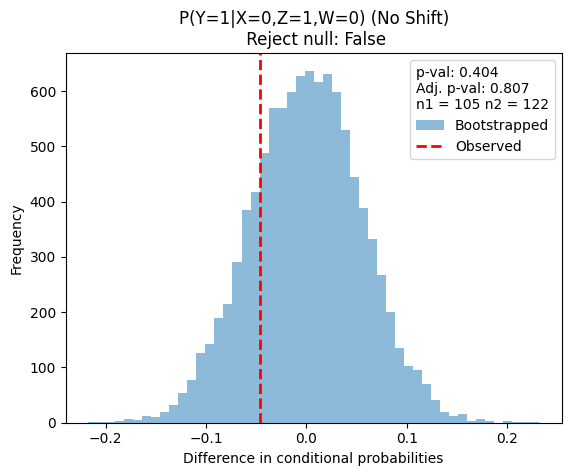

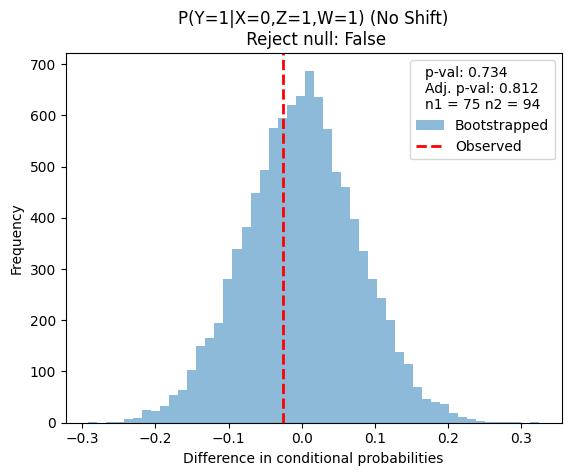

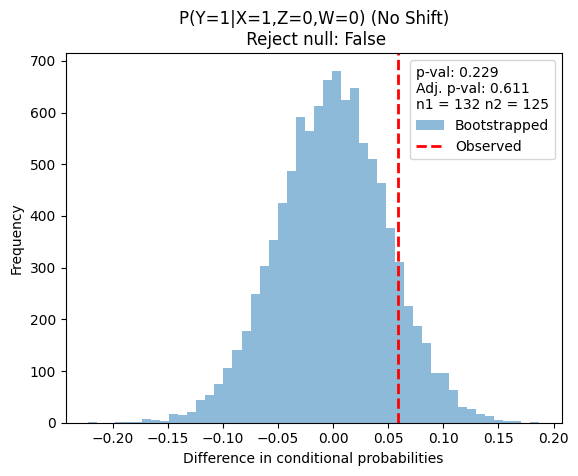

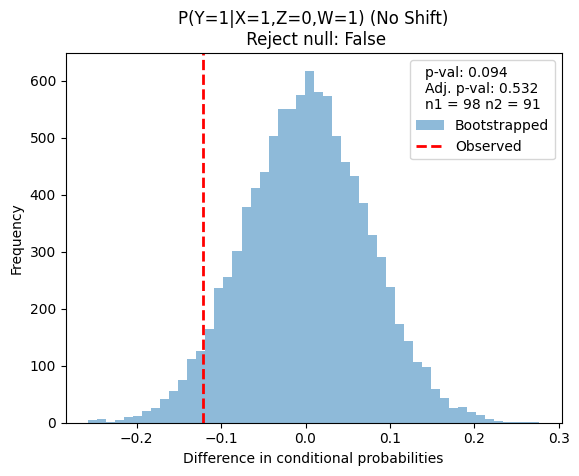

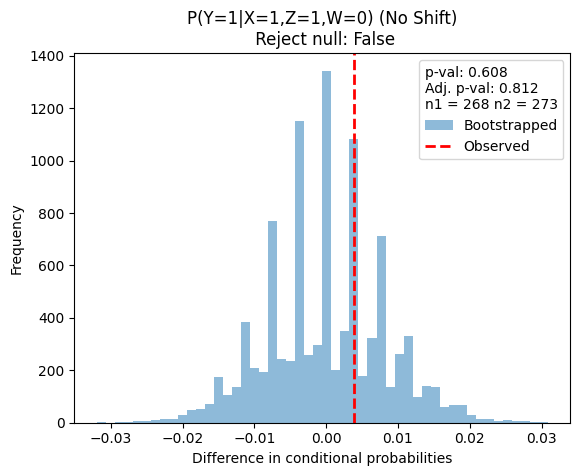

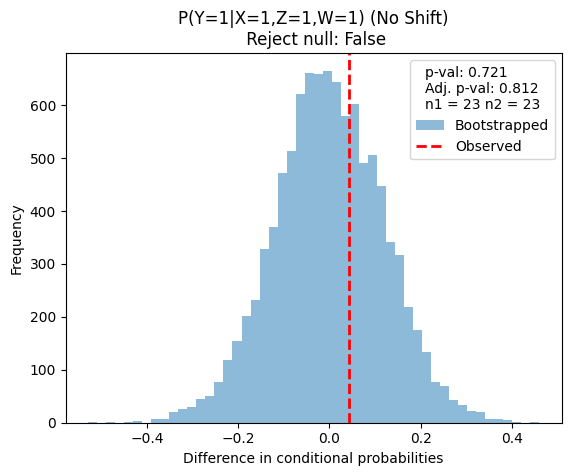

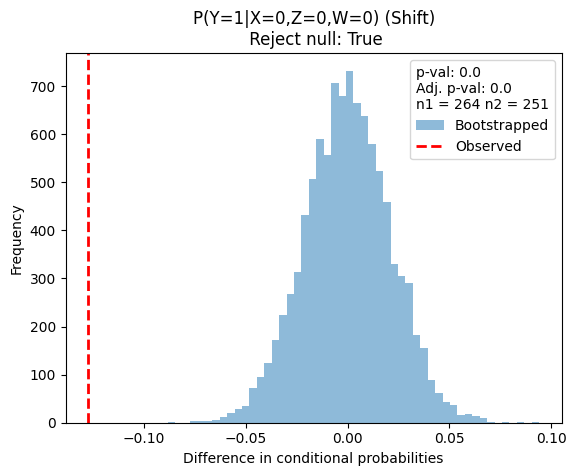

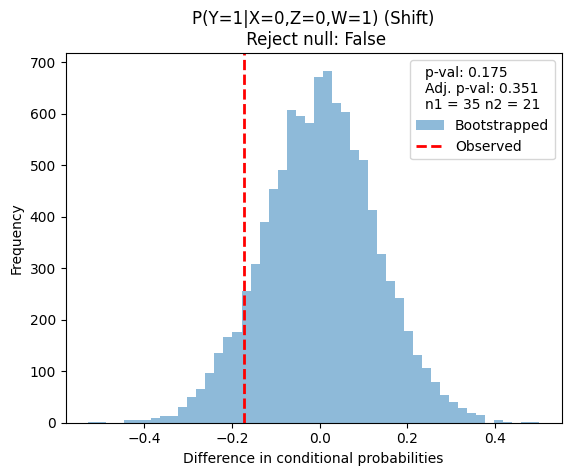

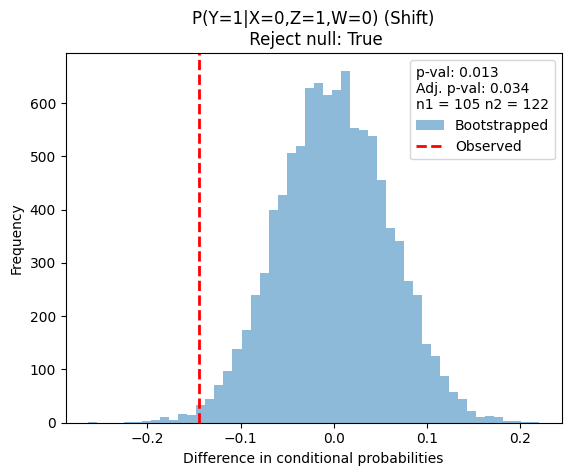

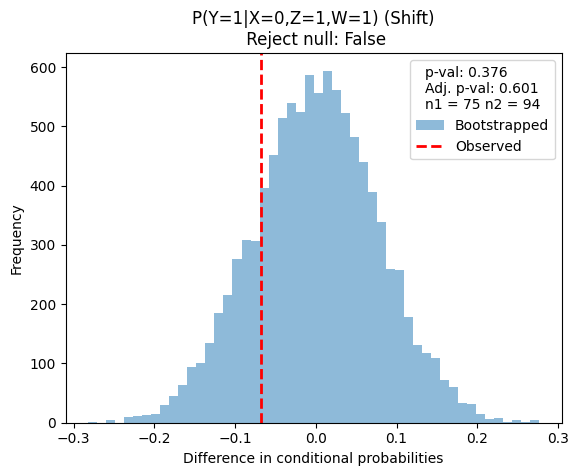

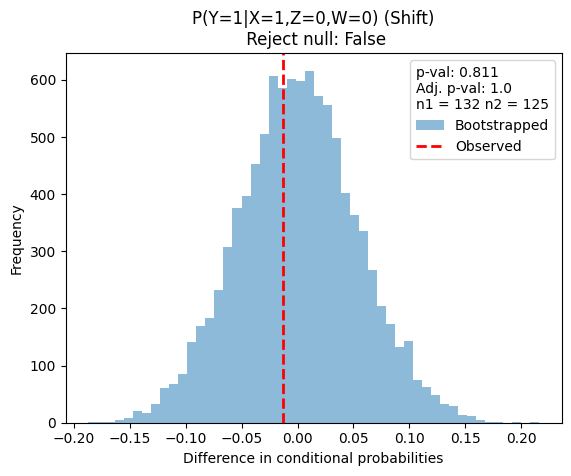

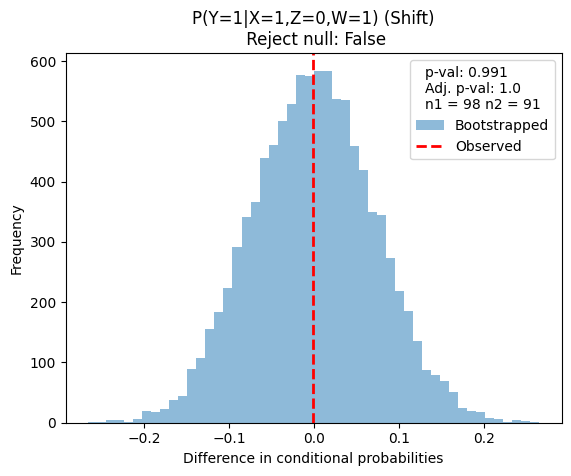

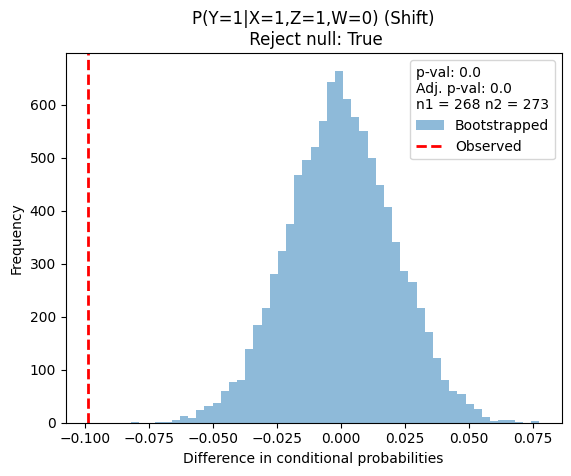

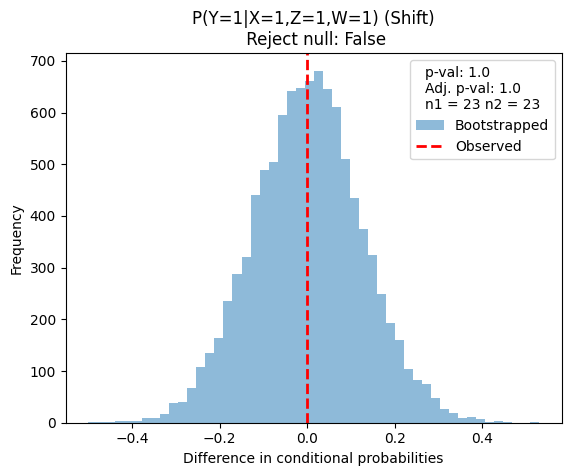

In [44]:
#Investigate the distribution of the bootstrapped differences using histograms
#Besides the histograms, we also include the observed differences in the plots as a vertical line and additionally display the p-values
#Sample 1 vs Sample 2
combinations_X_Z_W = ["P(Y=1|X=0,Z=0,W=0)", "P(Y=1|X=0,Z=0,W=1)", "P(Y=1|X=0,Z=1,W=0)", "P(Y=1|X=0,Z=1,W=1)", "P(Y=1|X=1,Z=0,W=0)", "P(Y=1|X=1,Z=0,W=1)", "P(Y=1|X=1,Z=1,W=0)", "P(Y=1|X=1,Z=1,W=1)"]
count_each_combination_X_Z_W = sample_1.groupby(group_cols).count().reset_index()
count_each_combination_X_Z_W_sample_1 = sample_1.groupby(group_cols).count().reset_index()['Y'].values 
count_each_combination_X_Z_W_sample_2 = sample_2.groupby(group_cols).count().reset_index()['Y'].values

for i in range(len(difference_sample_1_sample_2)):
    plt.hist(bootstrap_difference_sample_1_sample_2[i,:], bins=50, alpha=0.5, label='Bootstrapped')
    plt.axvline(x=difference_sample_1_sample_2['difference'].values[i], color='r', linestyle='dashed', linewidth=2, label='Observed')
    #Add the combinations of X,Z,W to the plot as title, the p-values and the decision rule
    plt.title(combinations_X_Z_W[i] + " (No Shift)" +"\n Reject null: " + str(adjusted_p_values_sample_1_sample_2_benjamini_hochberg[i] < 0.05))
    #Add the unadjusted and adjusted p-values to the plot legend using title =
    plt.legend(title = 'p-val: ' + str(np.round(p_values_sample_1_sample_2[i],3)) + 
               '\n' + 'Adj. p-val: ' + str(np.round(adjusted_p_values_sample_1_sample_2_benjamini_hochberg[i],3)) +
               '\n' + 'n1 = ' + str(count_each_combination_X_Z_W_sample_1[i]) + ' n2 = ' + str(count_each_combination_X_Z_W_sample_2[i]))
    plt.xlabel('Difference in conditional probabilities')
    plt.ylabel('Frequency')
    plt.savefig('images/testing/non_parametric_bootstrap/sample_1_sample_2_'+str(i)+'.png', bbox_inches='tight')
    plt.show()

#Sample 1 vs Sample 3
count_each_combination_X_Z_W_sample_3 = sample_3.groupby(group_cols).count().reset_index()['Y'].values 

for i in range(len(difference_sample_1_sample_3)):
    plt.hist(bootstrap_difference_sample_1_sample_3[i,:], bins=50, alpha=0.5, label='Bootstrapped')
    plt.axvline(x=difference_sample_1_sample_3['difference'].values[i], color='r', linestyle='dashed', linewidth=2, label='Observed')
    #Add the combinations of X,Z,W to the plot as title, the p-values and the decision rule
    plt.title(combinations_X_Z_W[i] + " (Shift)" +"\n Reject null: " + str(adjusted_p_values_sample_1_sample_3_benjamini_hochberg[i] < 0.05))
    #Add the unadjusted and adjusted p-values to the plot legend using title =
    plt.legend(title = 'p-val: ' + str(np.round(p_values_sample_1_sample_3[i],3)) + 
               '\n' + 'Adj. p-val: ' + str(np.round(adjusted_p_values_sample_1_sample_3_benjamini_hochberg[i],3)) +
               '\n' + 'n1 = ' + str(count_each_combination_X_Z_W_sample_1[i]) + ' n2 = ' + str(count_each_combination_X_Z_W_sample_3[i]))   
    plt.xlabel('Difference in conditional probabilities')
    plt.ylabel('Frequency')
    plt.savefig('images/testing/non_parametric_bootstrap/sample_1_sample_3_'+str(i)+'.png', bbox_inches='tight')
    plt.show()



# Repeat for larger sample sizes (10k,25k,50k)

In [45]:
#set a seed
#np.random.seed(0)
#Create sample hiring data with a shift for all the sample sizes
group_cols = ['X', 'Z', 'W']
sample_1_5k , sample_3_5k = hiring_data(1, n=5000)
sample_1_10k, sample_3_10k = hiring_data(1, n=10000)

#Compute the conditional probabilities for the individual samples
conditional_probabilities_sample_1_5k = sample_1_5k.groupby(group_cols)["Y"].mean().reset_index()
conditional_probabilities_sample_3_5k = sample_3_5k.groupby(group_cols)["Y"].mean().reset_index()
conditional_probabilities_sample_1_10k = sample_1_10k.groupby(group_cols)["Y"].mean().reset_index()
conditional_probabilities_sample_3_10k = sample_3_10k.groupby(group_cols)["Y"].mean().reset_index()


#Difference in conditional probabilities for sample 1 vs sample 3
difference_sample_1_sample_3_5k = conditional_probabilities_sample_1_5k.merge(conditional_probabilities_sample_3_5k, on=group_cols, suffixes=('_sample_1', '_sample_3'))
difference_sample_1_sample_3_5k["difference"] = difference_sample_1_sample_3_5k["Y_sample_1"] - difference_sample_1_sample_3_5k["Y_sample_3"]
difference_sample_1_sample_3_10k = conditional_probabilities_sample_1_10k.merge(conditional_probabilities_sample_3_10k, on=group_cols, suffixes=('_sample_1', '_sample_3'))
difference_sample_1_sample_3_10k["difference"] = difference_sample_1_sample_3_10k["Y_sample_1"] - difference_sample_1_sample_3_10k["Y_sample_3"]



#Create bootstrapped differences and p-values for all the sample sizes
#Sample 1 vs Sample 3
bootstrap_difference_sample_1_sample_3_5k = bootstrap_difference_conditional_probabilities(sample_1_5k,sample_3_5k)
bootstrap_difference_sample_1_sample_3_10k = bootstrap_difference_conditional_probabilities(sample_1_10k,sample_3_10k)



#p-values for all the sample sizes
#Sample 1 vs Sample 3
p_values_sample_1_sample_3_5k, adjusted_p_values_sample_1_sample_3_5k_benjamini_hochberg, adjusted_p_values_sample_1_sample_3_5k_bonferroni_holm = p_values(bootstrap_difference_sample_1_sample_3_5k, difference_sample_1_sample_3_5k['difference'].values, len(difference_sample_1_sample_3_5k))
p_values_sample_1_sample_3_10k, adjusted_p_values_sample_1_sample_3_10k_benjamini_hochberg, adjusted_p_values_sample_1_sample_3_10k_bonferroni_holm = p_values(bootstrap_difference_sample_1_sample_3_10k, difference_sample_1_sample_3_10k['difference'].values, len(difference_sample_1_sample_3_10k))




Bootstrapping:   0%|          | 0/10000 [00:00<?, ?it/s]

Calculating p-values: 100%|██████████| 8/8 [00:00<?, ?it/s]


In [46]:
for i in range(8):
    print("Sample size 5000")
    print("Combination: ", combinations_X_Z_W[i])
    print("P-value: ", p_values_sample_1_sample_3_5k[i])
    print("Adjusted p-value Benjamini-Hochberg: ", adjusted_p_values_sample_1_sample_3_5k_benjamini_hochberg[i])
    print('\n Sample size 10000')
    print("Combination: ", combinations_X_Z_W[i])
    print("P-value: ", p_values_sample_1_sample_3_10k[i])
    print("Adjusted p-value Benjamini-Hochberg: ", adjusted_p_values_sample_1_sample_3_10k_benjamini_hochberg[i])
    print("\n")
    


Sample size 5000
Combination:  P(Y=1|X=0,Z=0,W=0)
P-value:  0.0
Adjusted p-value Benjamini-Hochberg:  0.0

 Sample size 10000
Combination:  P(Y=1|X=0,Z=0,W=0)
P-value:  0.0
Adjusted p-value Benjamini-Hochberg:  0.0


Sample size 5000
Combination:  P(Y=1|X=0,Z=0,W=1)
P-value:  0.8109
Adjusted p-value Benjamini-Hochberg:  0.8109

 Sample size 10000
Combination:  P(Y=1|X=0,Z=0,W=1)
P-value:  0.0015
Adjusted p-value Benjamini-Hochberg:  0.002


Sample size 5000
Combination:  P(Y=1|X=0,Z=1,W=0)
P-value:  0.0
Adjusted p-value Benjamini-Hochberg:  0.0

 Sample size 10000
Combination:  P(Y=1|X=0,Z=1,W=0)
P-value:  0.0049
Adjusted p-value Benjamini-Hochberg:  0.0056


Sample size 5000
Combination:  P(Y=1|X=0,Z=1,W=1)
P-value:  0.104
Adjusted p-value Benjamini-Hochberg:  0.13866666666666666

 Sample size 10000
Combination:  P(Y=1|X=0,Z=1,W=1)
P-value:  0.0005
Adjusted p-value Benjamini-Hochberg:  0.0008


Sample size 5000
Combination:  P(Y=1|X=1,Z=0,W=0)
P-value:  0.0
Adjusted p-value Benjamini-

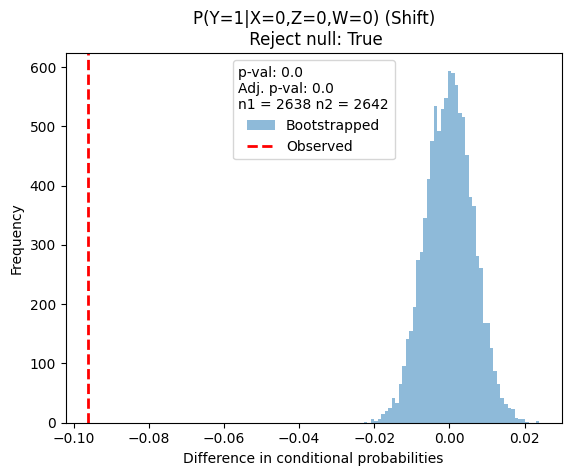

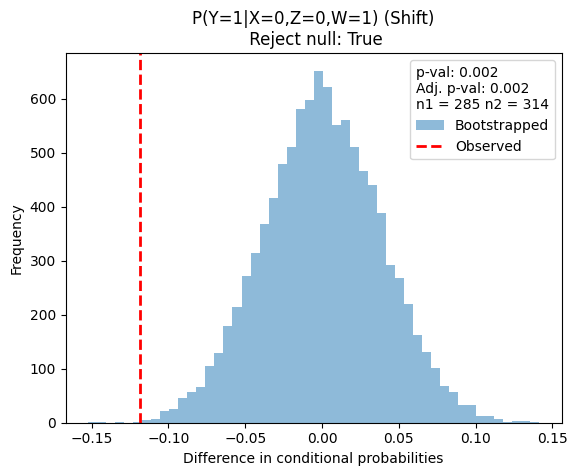

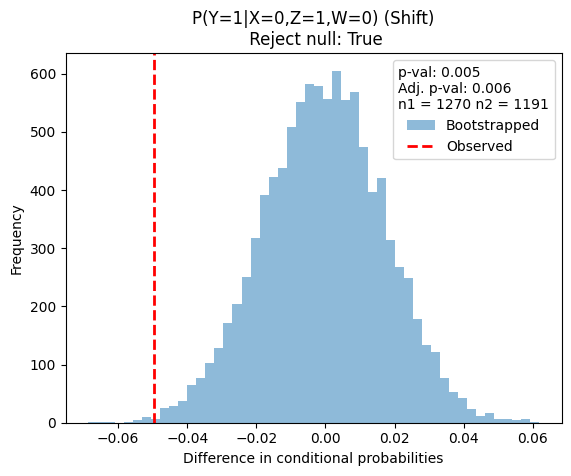

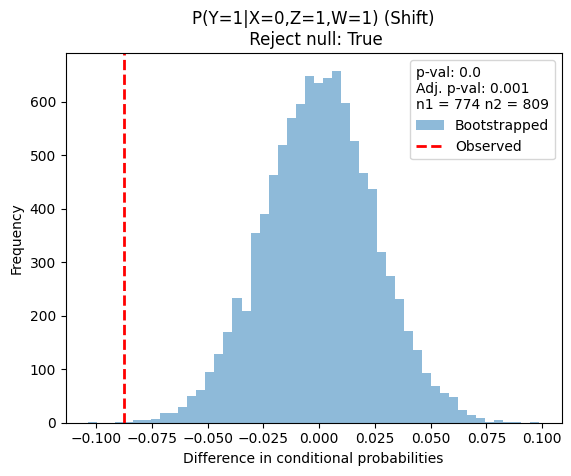

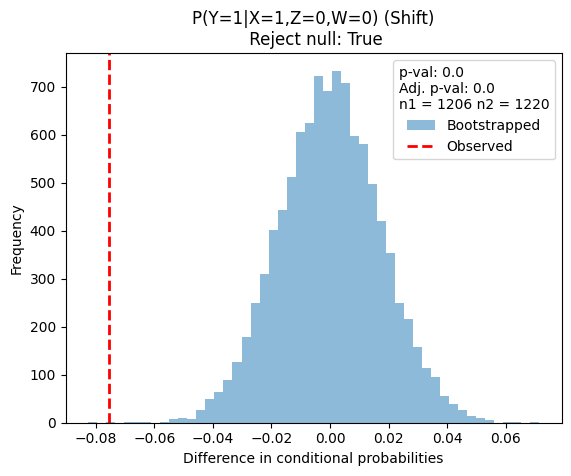

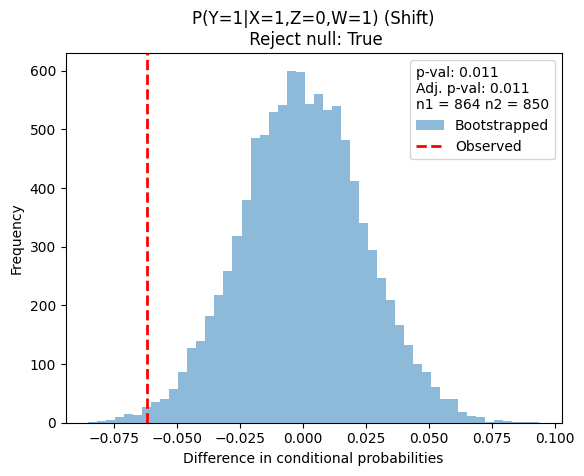

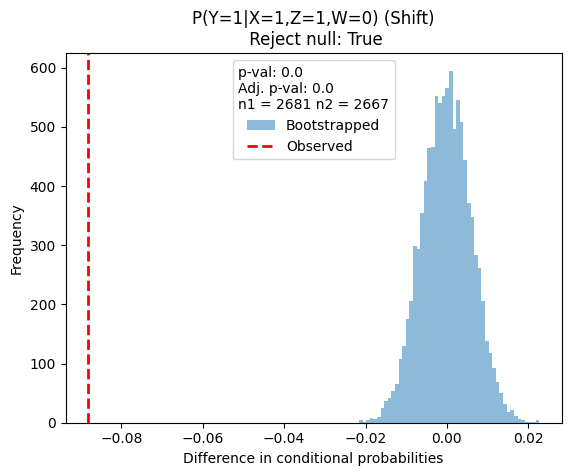

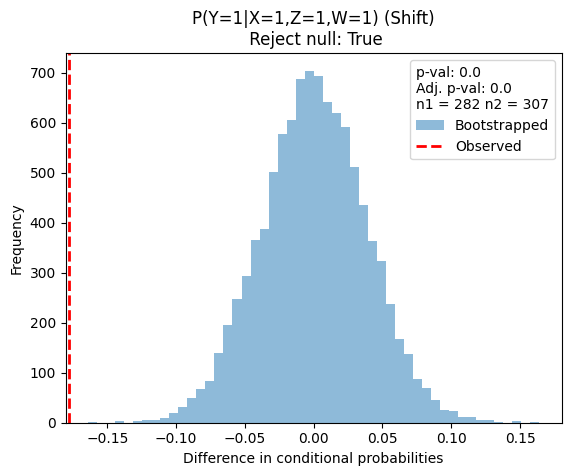

In [49]:
#Print histogramm for the sample size 10000
count_each_combination_X_Z_W_sample_1_10k = sample_1_10k.groupby(group_cols).count().reset_index()['Y'].values
count_each_combination_X_Z_W_sample_3_10k = sample_3_10k.groupby(group_cols).count().reset_index()['Y'].values



for i in range(len(difference_sample_1_sample_3_10k)):
    plt.hist(bootstrap_difference_sample_1_sample_3_10k[i,:], bins=50, alpha=0.5, label='Bootstrapped')
    plt.axvline(x=difference_sample_1_sample_3_10k['difference'].values[i], color='r', linestyle='dashed', linewidth=2, label='Observed')
    #Add the combinations of X,Z,W to the plot as title, the p-values and the decision rule
    plt.title(combinations_X_Z_W[i] + " (Shift)" +"\n Reject null: " + str(adjusted_p_values_sample_1_sample_3_10k_benjamini_hochberg[i] < 0.05))
    #Add the unadjusted and adjusted p-values to the plot legend using title =
    plt.legend(title = 'p-val: ' + str(np.round(p_values_sample_1_sample_3_10k[i],3)) + 
               '\n' + 'Adj. p-val: ' + str(np.round(adjusted_p_values_sample_1_sample_3_10k_benjamini_hochberg[i],3)) +
               '\n' + 'n1 = ' + str(count_each_combination_X_Z_W_sample_1_10k[i]) + ' n2 = ' + str(count_each_combination_X_Z_W_sample_3_10k[i]))   
    plt.xlabel('Difference in conditional probabilities')
    plt.ylabel('Frequency')
    plt.savefig('images/testing/non_parametric_bootstrap/sample_1_sample_3_10k_'+str(i)+'.png', bbox_inches='tight')
    plt.show()

In [57]:
group_cols = ["X","Z","W"]
len_sample_1 = len(sample_1)
len_sample_2 = len(sample_3)
combinations_X_Z_W = ["P(Y=1|X=0,Z=0,W=0)", "P(Y=1|X=0,Z=0,W=1)", "P(Y=1|X=0,Z=1,W=0)", "P(Y=1|X=0,Z=1,W=1)", "P(Y=1|X=1,Z=0,W=0)", "P(Y=1|X=1,Z=0,W=1)", "P(Y=1|X=1,Z=1,W=0)", "P(Y=1|X=1,Z=1,W=1)"]
counts_each_combination_sample_1 = sample_1.groupby(group_cols).count().reset_index()['Y'].values
counts_each_combination_sample_2 = sample_3.groupby(group_cols).count().reset_index()['Y'].values

#Group the data
grouped_sample_1 = sample_1.groupby(group_cols).sum().reset_index()
grouped_sample_2 = sample_3.groupby(group_cols).sum().reset_index()

#Create a 2x2 table for each combination of X,Z,W
##Columns: Sample 1 and Sample 2
##Rows: Y=0 and Y=1
table = np.zeros((2,2,len(grouped_sample_1)))

for i in range(len(grouped_sample_1)):
    table[0,0,i] = counts_each_combination_sample_1[i] - grouped_sample_1['Y'].values[i]
    table[0,1,i] = counts_each_combination_sample_2[i] - grouped_sample_2['Y'].values[i]
    table[1,0,i] = grouped_sample_1['Y'].values[i]
    table[1,1,i] = grouped_sample_2['Y'].values[i]

#We perform a chi-squared test for each combination of X,Z,W
for i in range(len(grouped_sample_1)):
    test_table = table[:,:,i]
    chi2, p, dof, ex = stats.chi2_contingency(test_table, correction=False)
    print("Chi-squared test for combination{ ", combinations_X_Z_W[i], "}")
    print("Chi-squared: ", chi2)
    print("P-value: ", p)
    print("Degrees of freedom: ", dof)
    print("Expected frequencies: ", ex)
    print("\n")


                                



Chi-squared test for combination{  P(Y=1|X=0,Z=0,W=0) }
Chi-squared:  35.88725841973721
P-value:  2.0907148719443287e-09
Degrees of freedom:  1
Expected frequencies:  [[247.5961165 235.4038835]
 [ 16.4038835  15.5961165]]


Chi-squared test for combination{  P(Y=1|X=0,Z=0,W=1) }
Chi-squared:  1.768421052631579
P-value:  0.18357760697256553
Degrees of freedom:  1
Expected frequencies:  [[23.75 14.25]
 [11.25  6.75]]


Chi-squared test for combination{  P(Y=1|X=0,Z=1,W=0) }
Chi-squared:  5.857283753165399
P-value:  0.015512715759440587
Degrees of freedom:  1
Expected frequencies:  [[75.85903084 88.14096916]
 [29.14096916 33.85903084]]


Chi-squared test for combination{  P(Y=1|X=0,Z=1,W=1) }
Chi-squared:  0.7705344684030531
P-value:  0.38005176102458504
Degrees of freedom:  1
Expected frequencies:  [[38.16568047 47.83431953]
 [36.83431953 46.16568047]]


Chi-squared test for combination{  P(Y=1|X=1,Z=0,W=0) }
Chi-squared:  0.058112598061836857
P-value:  0.8095043147528593
Degrees of free